In [18]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from dataset_generation import get_train_dataset, get_val_dataset
from scheduler import WarmupThenCosine

In [6]:

# train_clean = r'/home/pavan/Downloads/SUTD/Project/DCANet/dataset/train/clean/'
# train_noisy = r'/home/pavan/Downloads/SUTD/Project/DCANet/dataset/train/dirty/'

# val_clean = r'/home/pavan/Downloads/SUTD/Project/DCANet/dataset/val/clean/'
# val_noisy = r'/home/pavan/Downloads/SUTD/Project/DCANet/dataset/val/dirty/'


In [7]:
# train_clean_generator = tf.keras.preprocessing.image_dataset_from_directory(
#     directory=train_clean,
#     labels=None,
#     shuffle=False,
#     batch_size=32

# )

# train_noisy_generator = tf.keras.preprocessing.image_dataset_from_directory(
#     directory=train_noisy,
#     labels=None,
#     shuffle=False,
#     batch_size=32
# )

In [8]:
# train_dataset = tf.data.Dataset.zip((train_noisy_generator, train_clean_generator))
# train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

In [9]:
train_dataset = get_train_dataset()
val_dataset = get_val_dataset()

Found 20001 files.
Found 20001 files.
Found 4995 files.
Found 4995 files.


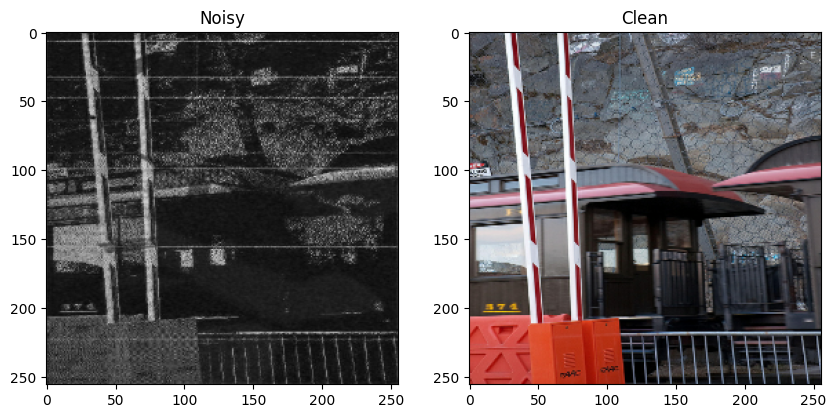

I0000 00:00:1764045364.760226    8266 local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
for noisy, clean in train_dataset.skip(124).take(1):

  # noisy = noisy.numpy()[0]/255.
  # clean = clean.numpy()[0]/255.
  noisy = noisy[0]/255.
  clean = clean[0][0]/255.
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.title('Noisy')
  plt.imshow(noisy)
  plt.subplot(1, 2, 2)
  plt.imshow(clean)
  plt.title('Clean')
  plt.show()

In [14]:
# val_clean_generator = tf.keras.preprocessing.image_dataset_from_directory(
#     directory=val_clean,
#     labels=None,
#     shuffle=False,
#     batch_size=32

# )

# val_noisy_generator = tf.keras.preprocessing.image_dataset_from_directory(
#     directory=val_noisy,
#     labels=None,
#     shuffle=False,
#     batch_size=32
# )

In [15]:
# val_dataset = tf.data.Dataset.zip((val_noisy_generator, val_clean_generator))
# val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

In [16]:
val_dataset = get_val_dataset()

Found 4995 files.
Found 4995 files.


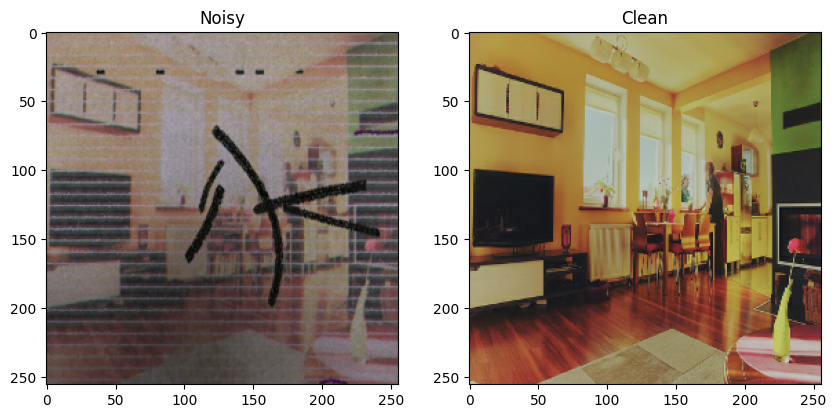

I0000 00:00:1764045493.401013    8266 local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
for noisy, clean in val_dataset.take(1):

  # noisy = noisy.numpy()[0]/255.
  # clean = clean.numpy()[0]/255.
  noisy = noisy[0]/255.
  clean = clean[0][0]/255.
  
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.title('Noisy')
  plt.imshow(noisy)
  plt.subplot(1, 2, 2)
  plt.imshow(clean)
  plt.title('Clean')
  plt.show()

W0000 00:00:1764003197.031582  310152 stream_executor_allocator.cc:67] could not allocate pinned host of size: 8589934592
W0000 00:00:1764003197.032929  310152 stream_executor_allocator.cc:67] could not allocate pinned host of size: 7730940928


Found 20001 files.
Found 20001 files.
626


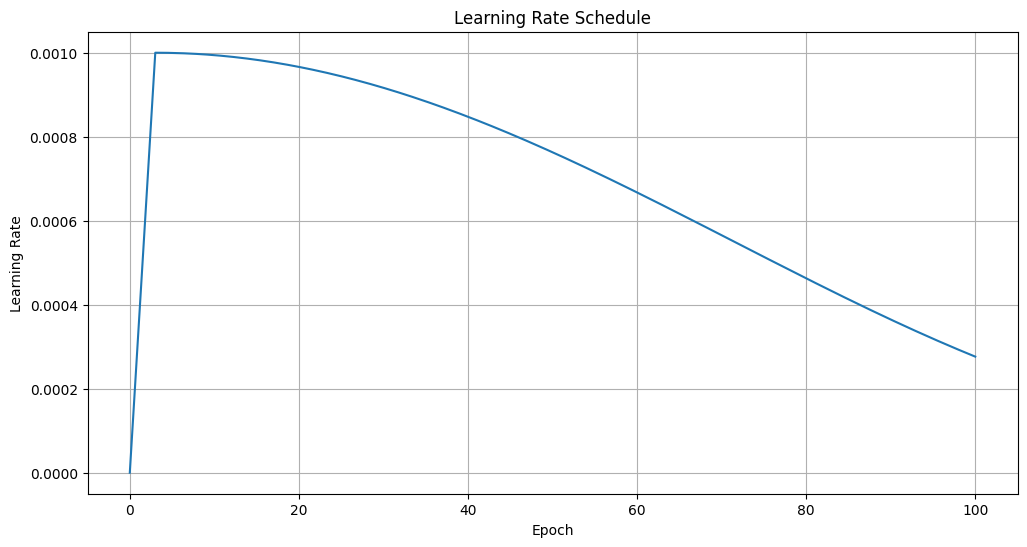

In [20]:

steps_per_epoch = get_train_dataset().cardinality().numpy()
print(steps_per_epoch)
# Create the scheduler with your actual parameters
lr_schedule = WarmupThenCosine(
    base_lr=1e-3,
    lr_min=1e-4,
    num_epochs=100,  # Your total epochs
    steps_per_epoch=steps_per_epoch,  # Use your actual steps_per_epoch here
    warmup_epochs=3,
    extra_epochs=40
)

# Generate for all epochs (not dependent on dataset)
total_steps = 100 * steps_per_epoch  # epochs * steps_per_epoch
steps = np.arange(total_steps)
learning_rates = [lr_schedule(step).numpy() for step in steps]

# Convert steps to epochs
epochs = steps / steps_per_epoch  # Divide by your actual steps_per_epoch

# Plot
plt.figure(figsize=(12, 6))
plt.plot(epochs, learning_rates)
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.show()